In [1]:
from music21 import *
from IPython.display import Image as img
from PIL import Image

(sec-intervals)=
# Intervals

>Our brains are wired to pick up the music that we expect, [and] generally music is consonant rather than dissonant, so we expect a nice chord. So when that chord is not quite what we expect, it gives you a little bit of an emotional frisson, because it's strange and unexpected. -- John Sloboda

If we push multiple piano keys, the color of the sound we perceive will be determined mainly by the relation between those keys, i.e., the generated *intervals*.
In that regard, compared to the exact pitches, *intervals* are much more important.
But instead of similarity we consider *consonant* and *dissonant* combinations of [notes](sec-notes) or more preceisly pitches.
In fact, two sound waves with very similar fundamental frequencies are dissonant. For example, pressing two consecutive piano keys results in a dissonant vibration because the sound waves do not overlap so much.
The first one vibrates with a frequency of $f$ herz and the second with a frequency of $f \cdot \sqrt[12]{2} \approx f \cdot 1.0594$ herz.

Building beautiful *melodies* with proper *harmonization* revolves around finding suitable sequences of sets of intervals.
Musicians play with and balance *dissonance* and *consonance*.
They build up tension, holding it and finally releasing it by wandering around a scale ending at the tonal home (most often the first note of a scale) of the piece.
A composition is often like a good story.
At the journey's beginning, we introduce our tonal world to the listener.
Then we introduce obstacles, turns, friction, and surprises.
We develop ideas and themes which center around different intervals.
They are so crucial that musicians give certain intervals specific names and functionalities!

An interval can be described as *vertical* or **harmonic** if the two notes sound simultaneously.
If they sound successively we speak of *horizontal*, *linear* or **melodic** intervals.
These can be *ascending* and *descending*.

## Frequency Ratios

Since I am a computer scientist and not a musician, I will start by looking at the relation of notes using my mathematical perspective first.
Before we talk about notes, chords, keys and so on, let us focus on the basics: frequencies!
Let $f_1 > f_2$ be some arbitrary frequencies, then the *ratio*

\begin{equation*}
    \frac{f_1}{f_2}
\end{equation*}

is the *interval* between $f_1$ and $f_2$.
We often notate an interval as $f_1$:$f_2$.
Consequently, an interval is defined as the ratio of two frequencies.
We can extend this concept to multiple frequencies $f_1, f_2, f_3$ for which we receive three intervals:

\begin{equation*}
    \frac{f_1}{f_2}, \frac{f_2}{f_3}, \frac{f_3}{f_1}.
\end{equation*}

However, if we consider piano keys things get more complicated since the vibration of a single piano string causes air pressure fluctuations that can not represented by a signal built from one fundamental frequency.
This is true for any analog instrument.
We have to add many harmonics to the fundamental frequency to recreate the sound.
Furthermore, the actual pitch is a perceptual property and depends on the listener.
For the sake of simplicity, we generalize and claim that the fundamental frequency, i.e., the frequency of the lowest partial, is the actual pitch of the vibration the listener hears.

In music theory, an *interval* may be loosely defined as the difference between two pitches, i.e., the ratio of two fundamentals.
Playing two piano keys gives the sound a specific color.
Relating multiple intervals by, for example, playing two times three different pitches in sequence, gives the resulting sound another quality.
It may evoke happiness, fear, darkness, melancholy, or tension.
It may be grounding, i.e., invoke a feeling of homecoming.

So, why do intervals have a psychological effect on us humans?
Everything starts with a *natural phenomenon* which has been referred to as *the basic miracle of music*.
After *unison* (an interval of 1:1), the **octave** (interval of 2:1) is the simplest interval in music.
An *octave* is the *interval* between one musical pitch and another double its frequency.
The human's (as well as monkey's, rat's, and infant's) ear tends to hear both frequencies/notes as being essentially the same due to closely related harmonics.
Remember that, two sine waves in a 2:1 frequency relation overlap half the time.
But more importantly, they stay in phase thus they cause no **beating effect**.

Pitches that are an *octave* apart are given the same key name in the *Western system of music notation*.
Keys causing a vibration with a fundamental frequency 440 Hz and 880 Hz are represented by the same note but they are one octave apart.
We say they belong to the same *pitch class*.
The number after the letter of a note indicates its octave.
For example, F4 means F (the key) in octave 4, while C5 means a C in octave 5.
F4 and F5 are in the same *pitch class* but have different pitches.

Compare the sound of the following two pattern.
Which melody sounds more consonant and why?
Can you hear the difference?

```isc
(
var base = 300;
Pbindef(\melody1,
    \instrument, \default,
    // complex ratios
    \freq, Pseq([base, base*21/17, 
                 base*37/17, base*11/7,
                 base*11/17, base*39/17], 6),
    \dur, 0.2,
    \legato, 0.1
).play;
)
```

In [2]:
import IPython.display as ipd
audio_path = '../../../sounds/inharmonic-melody.mp3'
ipd.Audio(audio_path)

```isc
(
var base = 300;
Pbindef(\melody2,
    \instrument, \default,
    // simple ratios
    \freq, Pseq([base, base*5/3, base*2/3, base*4/3, base/2, base*6/5], 6),
    \dur, 0.2,
    \legato, 0.1
).play;
)
```

In [3]:
audio_path = '../../../sounds/harmonic-melody.mp3'
ipd.Audio(audio_path)

The second example sounds rather consonant because all ratios are simple fractions of whole numbers.
It is however not necessary that ratios have to be simple rather they have to approximate simple fractions of whole numbers!
For example, the ratio of a **perfect fifth**, i.e. the most consonant interval other than **unison** and **octave**, in [12-TET](sec-tet-tuning) is equal to

$$2^{7/12} \approx 1.4983070 \approx 1.5 \approx \frac{3}{2}$$

$2^{7/12}$ is so close to 3:2 that it is almost impossible for us humans to hear the difference.
This is one of the reason why the 12-TET tuning system is generally accepted as the standard tuning system for Western music.

(sec-cent-semitones)=
## Cents and Semitones

**Cent** and **semitone** are intervals as well as logarithmic unit of measurement. 
As we know, frequency is expressed in a logarithmic scale.
Along that scale the distance between a given frequency and its double (an **octave**) is divided into 1200 equal parts, each of these parts is one **cent**.
A semitone is the smallest interval of two different notes playable on the piano, i.e., the distance between two consecutive keys or one **half step** or a **minor second (m2)**.

In [12-TET](sec-tet-tuning), a [tuning system](sec-tuning) in which all semitones have the same size, the size of one semitone is exactly 100 cents. 
Hence, in 12-TET the cent can be also defined as one hundredth of a semitone.
Mathematically, the size in cents of the interval from frequency $f_1$ to frequency $f_2$ is

$$1200 \cdot \log_2\left( \frac{f_1}{f_2} \right).$$

Notable, pitch can be perceived in a (logarithmic) range which is approximately the same for each person.
In a range from 10 to 25 **cents**, depending on the listeners hearing and musical education or exposer, pitch differences can be perceived.
In terms of a center frequency $f$, this gives us an interval defined by

\begin{equation*}
    f \cdot \lambda,
\end{equation*}

with $\lambda \in [-\epsilon;\epsilon]$ and

\begin{equation*}
   \epsilon \in \left[\frac{10}{1200}; \frac{25}{1200} \right] = \left[\frac{1}{120}; \frac{1}{48} \right] \approx \left[0.0083; 0.208 \right].
\end{equation*}

Therefore, our perception ability widely outperforms the variants a musician can perform on a piano but it covers most of the consonant options.


## Musical Intervals

In music theory, intervals are the relationship between any two notes.
Therefore, we limit ourselves to a few amount of possible intervals.
But this limitations results in a good distinction between [notes](sec-notes), [chords](sec-chords), and [scales](sec-scales).
The name of the interval has two parts.
First, the **type** of the interval and second the **distance** the two notes are from each other.

### Distance

To determine the distance of an interval on a *staff*, we count the lines and gaps between the two notes including the positions of the notes.
In the following we have a F4 and C5 on the *staff* and there are two lines and three gaps inbetween them.
Therefore, the distance is a *fifth*.

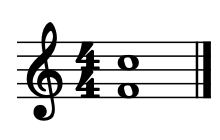

In [4]:
f = chord.Chord(['F4', 'C5'], duration=duration.Duration(4.0))
path = f.write('musicxml.png')
im = Image.open(path)
# (left, top, right, bottom)
im = im.crop((170, 310, 390, 450))
display(im)

This is true regardless of the [scale](sec-scales) we are using!
If we are in the key of C major (all white keys on the piano), F4 to C5 are 7 semitones (**perfect**) apart, while G4 to D5 are also 7 semitones apart.
Lowering the note C5 to C5b results in an interval F4-C5b of 6 semitones, i.e. a **diminished fifth**.
The distance on the staff stays the same but we add a little $b$ symbol to indicate the modification.
Highering the note C5 to C5# results in an interval F4-C5# of 8 semitones, i.e. a **augmented fifth**.
The distance on the staff stays the same but we add a little $\#$ symbol to indicate the modification.
The staff below shows all four (vertical) intervals:

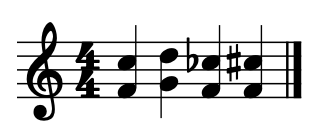

In [5]:
f1 = chord.Chord(['F4', 'C5'], duration=duration.Duration(1))
f2 = chord.Chord(['G4', 'D5'], duration=duration.Duration(1.0))
f3 = chord.Chord(['F4', 'C5b'], duration=duration.Duration(1.0))
f4 = chord.Chord(['F4', 'C5#'], duration=duration.Duration(1.0))
s = stream.Stream()
s.append(f1)
s.append(f2)
s.append(f3)
s.append(f4)
path = s.write('musicxml.png')
im = Image.open(path)
# (left, top, right, bottom)
im = im.crop((170, 310, 500, 450))
display(im)

A **third** can be 5 semitones (**augmented**) **third** e.g. C to E#, 4 semitones (**major**) **third**, e.g. C to E, 3 semitones (**minor**) **third**, e.g. E to G or 2 semitones apart, e.g. E to Gb (**diminished**) **third**.
Note that the augmented third C to E# can also be written as C to F but in this case we would call it a **perfect fourth**!
The staff below shows all four (vertical) intervals:

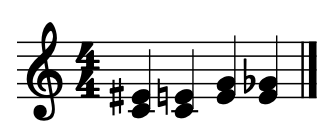

In [6]:
f0 = chord.Chord(['C4', 'E4#'], duration=duration.Duration(1.0))
f1 = chord.Chord(['C4', 'E4'], duration=duration.Duration(1.0))
f2 = chord.Chord(['E4', 'G4'], duration=duration.Duration(1.0))
f3 = chord.Chord(['E4', 'G4b'], duration=duration.Duration(1.0))
s = stream.Stream()
s.append(f0)
s.append(f1)
s.append(f2)
s.append(f3)
path = s.write('musicxml.png')
im = Image.open(path)
# (left, top, right, bottom)
im = im.crop((170, 310, 500, 450))
display(im)

The distance is also called *diatonic numbering* because the distance correspond to the degrees of the [diatonic scale](sec-diatonic-scale).
For instance, C-G is a **fifth** because the notes from C to G encompass five letter names (C, D, E, F, G) and it encompass five notes of the diatonic scale, for example, C-Db-Eb-F-G for the *Ab major diatonic scale*.

Also remember that if we compute the **distance**, we start counting from one.
Therefore, C4-C4 is counted as one (*unison*), even though there is no difference between the endpoints!

Adding accidentals (flats $b$ and sharps $\#$) to the notes that form an interval does not change its distance.
For instance, the interval C-G# (spanning 8 semitones, i.e., a augmented fifth) and C-Gb (spanning 6 semitones, i.e., a diminished fifth) can be regarded as fifths like the corresponding natural interval C-G (7 semitones).

However, if we change the letters, we also speak of different distances!
For instance, instead of C-Gb we could describe the interval as C-F# since F# and Gb are enharmonic.
In this case we speak of an **augmented fourth** since the natural, i.e. **perfect fourth** spans C-G.

### Quality

The name of any interval is further qualified using the terms **perfect** (**P**), **major** (**M**), **minor** (**m**), **augmented** (**A**/$+$), and **diminished** (**dim**/$\circ$).
This is called the *interval quality*.

In any [major scale](sec-diatonic-scale), the *unison*, *fourth*, *fifth* and *octave* from the *tonic* (of the scale) to the respective other note in the scale are **perfect** and all other intervals are **major**.
In any [(natural) minor scale](sec-minor-scale) on the other hand, the *unison*, *fourth*, *fifth* and *octave* stay **perfect** but the *third*, *sixth* and *seventh* are **minor**.
The *second* stays a **major**.

A **minor** interval is one half step / 1 semitone / 100 cents smaller than a **major** interval.
And if we make a minor interval even one half step smaller, it becomes **diminished**.
In the contrary, by making a major one half step larger it becomes **augmented**.
There is however no minor interval version of a perfect interval.
Lowering a **perfect** by one half step makes it **diminished**.
When making it one half step larger, it becomes **augmented**.

Perfect intervals are consonant.
By definition, the inversion of a perfect interval is also perfect since 

$$12 - 7 + 2 = 7.$$

All other intervals are less consonant.
The inversion of a minor interval is major and vice versa and the inversion of an augmented invertal is a dimished interval.
For example, a major third (4 semitones becames)

$$12-4 + 2 = 10$$

a minor seventh (10 semitones).

### Overview

The following table lists special names for important intervals.
For each natural interval there exists at least an augmented or diminished "version" that is *enharmonic*.
For example, a **major second** is enharmonic to an **diminished third** and **perfect fourth** is enharmonic to an **augmented third**. 
Therefore there are many enharmonic intervals different names.
The name depends on the musical context they have been used.

Furthermore, there are two different tunings listed in the table:

1. *[Twelve-tone equal temperament (12-TET)](sec-tet-tuning)*
2. *[Just intonation](sec-p-tuning)* or *Pythagorean pure intonation*

For the *equal temperament* the ratios slightly differ; they are irrational.
For example, $6/5 = 1.2$ becomes $\sqrt[3]{2} \approx 1.1892$.

| Natural Interval Name              | Symbol    | 12-TET                        | Just                  | Semitones |
| ---------------------------------- | --------- | ----------------------------- | --------------------- | --------- |
| Unison (P1)                        | I         | 1                             | 1:1                   | 0         |
| Minor second (m2)                  | ii        | 1.058                         | 16:15                 | 1         |
| Major second (M2)                  | II        | 1.122                         | 9:8                   | 2         |
| Minor third (m3)                   | iii       | 1.189                         | 6:5                   | 3         |
| Major third (M3)                   | III       | 1.26                          | 5:4                   | 4         |
| Perfect fourth (P4)                | IV        | 1.334                         | 4:3                   | 5         |
| Tritone (TT)                       | v$^\circ$ | 1.414                         | 64:45                 | 6         |
| Perfect fifth (P5)                 | V         | 1.498                         | 3:2                   | 7         |
| Minor sixth (m6)                   | vi        | 1.587                         | 8:5                   | 8         |
| Major sixth (M6)                   | VI        | 1.682                         | 5:3                   | 9         |
| Minor seventh (m7)                 | vii       | 1.781                         | 16:9	              | 10        |
| Major seventh (M7)                 | VII       | 1.888                         | 15:8                  | 11        |
| Octave (P8)                        | VIII      | 2                             | 2:1                   | 12        |

Let us listen to each interval.
The following code plays each interval from C to X in ascending order, i.e., X = C#, D, D#, E and so on.

```isc
(
Pbind(
    \scale, Scale.chromatic,
    \degree, Pseq([(0..11), [0]].allTuples, 1),
    \dur, 0.5
).play;
)
```

In [7]:
audio_path = '../../../sounds/chromatic-intervals.mp3'
ipd.Audio(audio_path)

*Intervals* can sound pleasingly consonant or dissonant.
Simple **or** close to simple ratios tend to sound consonant while complicated ratios tend to sound dissonant.
An *octave* (2:1) sounds perfectly consonant.
The *perfect fifth* (3:2), the *perfect fourth* (4:3), and the *minor* and *major third* are consonant.
While dissonance is less pleasing, it can create drama, excitement, and tension.
It is an important property to use in composing music.

Hermann von Helmholtz categorises the octave, perfect fifth, perfect fourth, major sixth, major third, and minor third as consonant, in decreasing value, and other intervals as dissonant.

Many others make the following distinction:

+ **Perfect consonance** (perfect unisons, fifths, and octaves)
+ **Imperfect consonance** (major and minor third and sixths)
+ **Dissonance** (all seconds, sevenths, and diminished and augmented intervals)

The **perfect fourth** is often regared as dissonant when it involves the lowest voice in the texture, but consonant when it occurs between two upper voices.

```{figure} ../../../figs/composing/piano-keys-intervals.png
---
width: 800px
name: fig-piano-keys-intervals
---
Piano keys: the octave in blue, the perfect fourth in red, and the minor third in green. Note that only the distance between keys, i.e., their relation matters!
```

Let's compare one of the most dissonant intervals, the **tritone**

```isc
// tritone
(\scale: Scale.chromatic, \degree: [0, 6]).play;
```

In [8]:
audio_path = '../../../sounds/tritone.mp3'
ipd.Audio(audio_path)

with one of the most consonant intervals, the **perfect fifth**.

```isc
// perfect fifth
(\scale: Scale.chromatic, \degree: [0, 7]).play;
```

In [9]:
audio_path = '../../../sounds/perfect-fifth.mp3'
ipd.Audio(audio_path)

Can you hear the difference?

(sec-tritone)=
## The Devil’s Tritone

Some regard the **tritone** (aka diminished fifth) as *the devil's interval* because it is highly dissonant and has inspired composers to explore the dark side of music.
Music listeners' almost instinctive desire to hear a song through to its rhythmic and harmonic conclusion can be an effective (if torturous) tool throughout the fields of music composition and scoring.
Interestingly, the tritone is symmetric, that is, any [inversion](sec-inversion) will result in a tritone; C-F# are 6 semitones and F#-C alsp span 6 semitones.

The dissonant intervals of the *devil's tritone* are particularly affecting because of this listener's instinct to find resolution in music and the fact that we are used to getting it.
Music, in that sense, is a play around expectations and a balance between repetition and surprise;
The expectancy violation makes us a little upset, and we ask for a resolution.
Thus music can be violent, it can lure us into desires;
keeping us thirsty in the desert of silence.